In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

df = pd.read_csv('data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   icustay_id      61532 non-null  int64  
 1   day_28_flag     61532 non-null  int64  
 2   icu_exp_flag    61532 non-null  int64  
 3   ethnicity       61532 non-null  object 
 4   gender          61532 non-null  object 
 5   age             61532 non-null  float64
 6   length_of_stay  61522 non-null  float64
 7   service_type    61532 non-null  object 
 8   weight          47798 non-null  float64
 9   height_inches   24974 non-null  float64
 10  sofa            61532 non-null  int64  
 11  DiasBP          52425 non-null  float64
 12  HeartRate       60185 non-null  float64
 13  MAP             52432 non-null  float64
 14  SpO2            52390 non-null  float64
 15  SysBP           52426 non-null  float64
 16  Temperature     52278 non-null  float64
 17  BUN             53823 non-null 

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
icustay_id,61532.0,249962.710248,28890.574867,200001.00,224935.500000,249940.000000,274972.500000,299999.00
day_28_flag,61532.0,0.136157,0.342958,0.00,0.000000,0.000000,0.000000,1.00
icu_exp_flag,61532.0,0.057694,0.233165,0.00,0.000000,0.000000,0.000000,1.00
age,61532.0,64.887688,56.914193,0.00,44.350000,62.070000,76.060000,311.56
length_of_stay,61522.0,4.441224,9.632298,0.00,1.000000,2.000000,4.000000,173.00
weight,47798.0,73.345676,32.604110,0.37,60.799999,75.000000,90.000000,1251.00
height_inches,24974.0,66.340643,7.482702,0.00,64.000000,67.000000,70.000000,191.00
sofa,61532.0,3.953975,3.149717,0.00,2.000000,3.000000,6.000000,22.00
DiasBP,52425.0,60.268441,10.875497,13.50,53.000000,59.000000,67.000000,125.00
HeartRate,60185.0,91.577328,24.227343,0.00,75.500000,86.000000,100.000000,266.50


In [3]:
df.insert(3,"day_28_after_discharge_flag", df["day_28_flag"] ^ df["icu_exp_flag"])
df

,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,Temperature,BUN,CHLORIDE,CREATININE,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC
0,243653,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,NaN,16.5,302.0,NaN,NaN,NaN,22.0
1,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,36.900002,17.0,96.0,1.3,9.7,191.0,3.4,138.0,23.0,10.5
2,294638,0,0,0,WHITE,F,47.84,1.0,MICU,NaN,...,36.666667,16.0,106.0,0.4,10.5,258.0,3.8,138.0,21.0,7.3
3,214757,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,NaN,14.9,309.0,NaN,NaN,NaN,13.9
4,228232,0,0,0,WHITE,F,65.94,3.0,SICU,NaN,...,36.555557,73.0,101.0,5.1,12.4,168.0,4.7,130.0,14.0,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,279638,0,0,0,WHITE,M,53.81,11.0,MICU,71.000000,...,37.666667,17.0,105.0,1.0,8.2,948.0,4.2,136.0,23.0,20.4
61528,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,37.027778,20.0,109.0,0.9,8.9,351.0,3.7,145.0,30.0,7.7
61529,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,36.555556,44.0,105.0,0.8,10.4,132.0,4.3,137.0,26.0,16.0
61530,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,36.944444,11.0,98.0,0.4,8.9,124.0,4.2,137.0,33.0,6.4


In [4]:
df.replace(r'^\s*$', np.nan, regex=True)

,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,Temperature,BUN,CHLORIDE,CREATININE,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC
0,243653,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,NaN,16.5,302.0,NaN,NaN,NaN,22.0
1,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,36.900002,17.0,96.0,1.3,9.7,191.0,3.4,138.0,23.0,10.5
2,294638,0,0,0,WHITE,F,47.84,1.0,MICU,NaN,...,36.666667,16.0,106.0,0.4,10.5,258.0,3.8,138.0,21.0,7.3
3,214757,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,NaN,14.9,309.0,NaN,NaN,NaN,13.9
4,228232,0,0,0,WHITE,F,65.94,3.0,SICU,NaN,...,36.555557,73.0,101.0,5.1,12.4,168.0,4.7,130.0,14.0,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,279638,0,0,0,WHITE,M,53.81,11.0,MICU,71.000000,...,37.666667,17.0,105.0,1.0,8.2,948.0,4.2,136.0,23.0,20.4
61528,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,37.027778,20.0,109.0,0.9,8.9,351.0,3.7,145.0,30.0,7.7
61529,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,36.555556,44.0,105.0,0.8,10.4,132.0,4.3,137.0,26.0,16.0
61530,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,36.944444,11.0,98.0,0.4,8.9,124.0,4.2,137.0,33.0,6.4


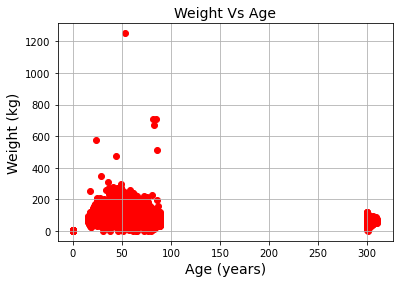

In [5]:
plt.scatter(df['age'], df['weight'], color='red')
plt.title('Weight Vs Age', fontsize=14)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.grid(True)
plt.show()

In [6]:
# An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
# Set all of such outliers to NaN

filt_df = df[['age','height_inches','weight','HeartRate','MAP','SpO2','Temperature','BUN','CHLORIDE','CREATININE','HEMOGLOBIN','PLATELET','POTASSIUM','SODIUM','TOTALCO2','WBC']]
for col in filt_df.columns:
    arr = np.abs(stats.zscore(df[col], nan_policy = 'omit')) 
    arr[np.isnan(arr)] = 4 
    a = (np.where(arr > 3, 4, arr))
    d = pd.DataFrame(a, columns = ['test'])
    df[col].loc[d['test'] == 4] = np.nan
    
df

/home/sharing/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,Temperature,BUN,CHLORIDE,CREATININE,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC
0,243653,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,NaN,16.5,302.0,NaN,NaN,NaN,22.0
1,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,36.900002,17.0,96.0,1.3,9.7,191.0,3.4,138.0,23.0,10.5
2,294638,0,0,0,WHITE,F,47.84,1.0,MICU,NaN,...,36.666667,16.0,106.0,0.4,10.5,258.0,3.8,138.0,21.0,7.3
3,214757,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,NaN,14.9,309.0,NaN,NaN,NaN,13.9
4,228232,0,0,0,WHITE,F,65.94,3.0,SICU,NaN,...,36.555557,73.0,101.0,5.1,12.4,168.0,4.7,130.0,14.0,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,279638,0,0,0,WHITE,M,53.81,11.0,MICU,71.000000,...,37.666667,17.0,105.0,1.0,8.2,NaN,4.2,136.0,23.0,20.4
61528,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,37.027778,20.0,109.0,0.9,8.9,351.0,3.7,145.0,30.0,7.7
61529,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,36.555556,44.0,105.0,0.8,10.4,132.0,4.3,137.0,26.0,16.0
61530,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,36.944444,11.0,98.0,0.4,8.9,124.0,4.2,137.0,33.0,6.4


In [7]:
# Create bmi column to impute missing height values as there are more missing height values than weight values

df['height_inches'] = df['height_inches'].apply(lambda x: x* 0.0254)
df = df.rename(columns = {'height_inches': 'height'})
df["bmi"] = df["weight"] / (df["height"] * df["height"])
df

,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,BUN,CHLORIDE,CREATININE,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC,bmi
0,243653,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,16.5,302.0,NaN,NaN,NaN,22.0,NaN
1,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,17.0,96.0,1.3,9.7,191.0,3.4,138.0,23.0,10.5,30.187678
2,294638,0,0,0,WHITE,F,47.84,1.0,MICU,NaN,...,16.0,106.0,0.4,10.5,258.0,3.8,138.0,21.0,7.3,NaN
3,214757,0,0,0,ASIAN,M,0.00,0.0,NICU,NaN,...,NaN,NaN,NaN,14.9,309.0,NaN,NaN,NaN,13.9,NaN
4,228232,0,0,0,WHITE,F,65.94,3.0,SICU,NaN,...,73.0,101.0,5.1,12.4,168.0,4.7,130.0,14.0,4.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,279638,0,0,0,WHITE,M,53.81,11.0,MICU,71.000000,...,17.0,105.0,1.0,8.2,NaN,4.2,136.0,23.0,20.4,21.831030
61528,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,20.0,109.0,0.9,8.9,351.0,3.7,145.0,30.0,7.7,NaN
61529,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,44.0,105.0,0.8,10.4,132.0,4.3,137.0,26.0,16.0,NaN
61530,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,11.0,98.0,0.4,8.9,124.0,4.2,137.0,33.0,6.4,26.982454


In [8]:
# Removing all NaN values from all columns except height

df1 = df.dropna(subset = ['age', 'weight', 'DiasBP','SysBP','HeartRate','MAP','SpO2','Temperature','BUN','CHLORIDE','CREATININE','HEMOGLOBIN','PLATELET','POTASSIUM','SODIUM','TOTALCO2','WBC'])
df1 = df1.reset_index(drop = True)
df1 = df1[df1["CREATININE"] != 0]
df1

,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,BUN,CHLORIDE,CREATININE,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC,bmi
0,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,17.0,96.0,1.3,9.7,191.0,3.4,138.0,23.0,10.5,30.187678
1,220597,1,1,0,UNKNOWN/NOT SPECIFIED,M,41.79,5.0,MICU,104.000000,...,33.0,107.0,2.0,12.6,330.0,3.5,137.0,29.0,11.1,31.095741
2,232669,1,0,1,WHITE,M,72.37,7.0,SICU,75.000000,...,29.0,100.0,1.1,12.4,279.0,3.8,135.0,23.0,30.2,NaN
3,263738,0,0,0,WHITE,F,39.86,3.0,CCU,72.199997,...,13.0,104.0,0.4,8.8,103.0,4.1,138.0,29.0,14.3,34.444512
4,277042,0,0,0,WHITE,F,47.45,2.0,CSRU,67.900002,...,11.0,108.0,0.6,10.7,253.0,4.7,136.0,23.0,20.2,24.531254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36330,286606,0,0,0,UNKNOWN/NOT SPECIFIED,M,78.58,1.0,CCU,77.000000,...,15.0,106.0,1.2,11.9,208.0,4.5,140.0,30.0,5.3,NaN
36331,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,20.0,109.0,0.9,8.9,351.0,3.7,145.0,30.0,7.7,NaN
36332,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,44.0,105.0,0.8,10.4,132.0,4.3,137.0,26.0,16.0,NaN
36333,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,11.0,98.0,0.4,8.9,124.0,4.2,137.0,33.0,6.4,26.982454


In [9]:
# Create CKD-EPI column (eGFR)
# eGFR = 141 x min(SCr/κ, 1)^α x max(SCr/κ, 1)^-1.209 x 0.993^Age x 1.018 [if female] x 1.159 [if Black]

# Abbreviations / Units
# eGFR (estimated glomerular filtration rate) = mL/min/1.73 m2
# SCr (standardized serum creatinine) = mg/dL
# κ = 0.7 (females) or 0.9 (males)
# α = -0.329 (females) or -0.411 (males)
# min = indicates the minimum of SCr/κ or 1
# max = indicates the maximum of SCr/κ or 1
# age = years

df1["black"] = np.where(df1['ethnicity'].str.contains("black"), 1.159, 1)
df1["κ"] = np.where(df1['gender'] == "M", 0.9 , 0.7)
df1["α"] = np.where(df1['gender'] == "M", -0.411, -0.329)
df1["constant"] = np.where(df1['gender'] == "M", 1, 1.018)
df1["1"] = 1
df1["SCr/κ"] = df1['CREATININE']/df1["κ"]
df1["eGFR"] = 141 * (df1[["SCr/κ", '1']].min(axis=1) ** df1["α"]) * (df1[["SCr/κ", '1']].max(axis=1) ** -1.209) * (0.993 ** df1['age']) * df1['constant'] * df1['black']
df1 = df1.drop(df1.columns[28:34], axis=1)
df1

,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,CHLORIDE,CREATININE,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC,bmi,eGFR
0,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,96.0,1.3,9.7,191.0,3.4,138.0,23.0,10.5,30.187678,52.807704
1,220597,1,1,0,UNKNOWN/NOT SPECIFIED,M,41.79,5.0,MICU,104.000000,...,107.0,2.0,12.6,330.0,3.5,137.0,29.0,11.1,31.095741,40.037056
2,232669,1,0,1,WHITE,M,72.37,7.0,SICU,75.000000,...,100.0,1.1,12.4,279.0,3.8,135.0,23.0,30.2,NaN,66.538294
3,263738,0,0,0,WHITE,F,39.86,3.0,CCU,72.199997,...,104.0,0.4,8.8,103.0,4.1,138.0,29.0,14.3,34.444512,130.413771
4,277042,0,0,0,WHITE,F,47.45,2.0,CSRU,67.900002,...,108.0,0.6,10.7,253.0,4.7,136.0,23.0,20.2,24.531254,108.201735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36330,286606,0,0,0,UNKNOWN/NOT SPECIFIED,M,78.58,1.0,CCU,77.000000,...,106.0,1.2,11.9,208.0,4.5,140.0,30.0,5.3,NaN,57.337681
36331,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,109.0,0.9,8.9,351.0,3.7,145.0,30.0,7.7,NaN,100.833941
36332,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,105.0,0.8,10.4,132.0,4.3,137.0,26.0,16.0,NaN,76.949659
36333,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,98.0,0.4,8.9,124.0,4.2,137.0,33.0,6.4,26.982454,92.538989


In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
icustay_id,36330.0,250057.097715,28879.615234,200001.000000,225041.250000,250139.000000,275098.250000,299999.000000
day_28_flag,36330.0,0.118112,0.322745,0.000000,0.000000,0.000000,0.000000,1.000000
icu_exp_flag,36330.0,0.046986,0.211612,0.000000,0.000000,0.000000,0.000000,1.000000
day_28_after_discharge_flag,36330.0,0.071126,0.257038,0.000000,0.000000,0.000000,0.000000,1.000000
age,36330.0,63.051899,16.246569,15.050000,52.910000,64.910000,76.130000,89.030000
length_of_stay,36330.0,3.872915,6.414706,0.000000,1.000000,2.000000,4.000000,173.000000
weight,36330.0,80.859497,20.921917,1.000000,66.300003,78.699998,92.300003,171.000000
height,21078.0,1.697288,0.106526,1.117600,1.625600,1.701800,1.778000,2.133600
sofa,36330.0,4.112276,2.973587,0.000000,2.000000,4.000000,6.000000,22.000000
DiasBP,36330.0,60.632425,10.144029,24.000000,54.000000,60.000000,67.000000,104.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29ccf64a60>,
      dtype=object)

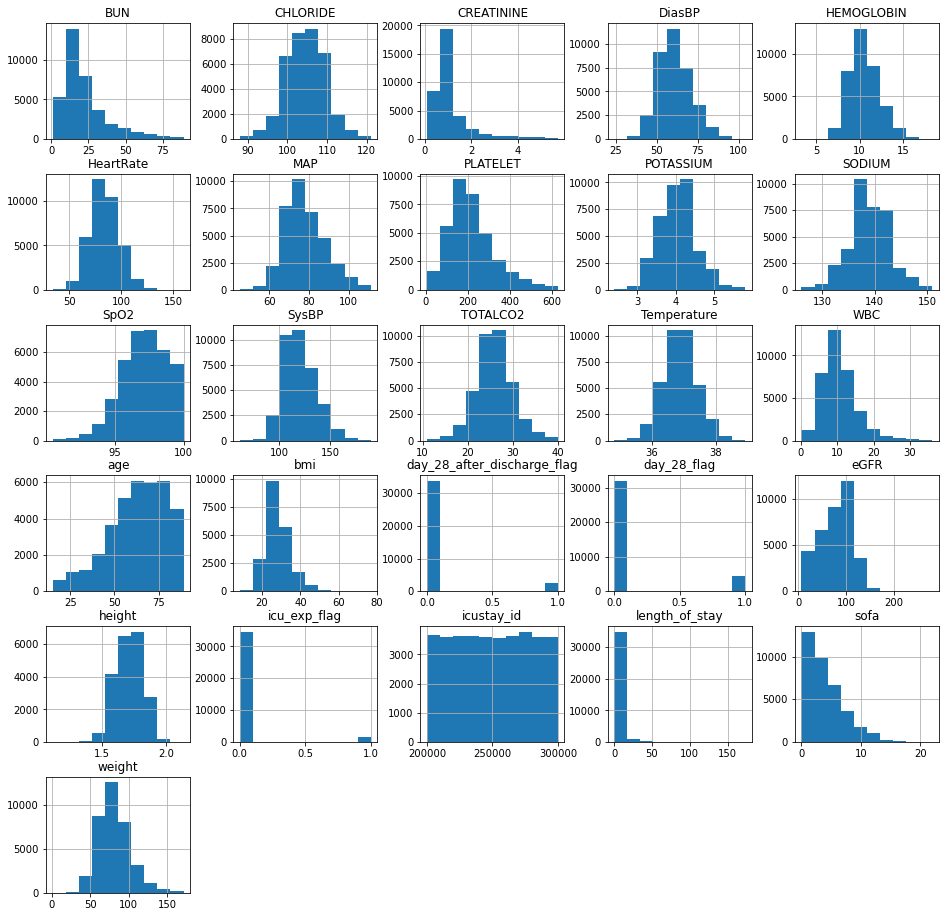

In [11]:
df1.hist(figsize=(16,16))

In [12]:
# Use bmi formula for regression, in hope of imputing missing height values

from sklearn import linear_model
import statsmodels.api as sm

df2 = df1.copy().dropna()

X = df2['weight'] 
Y = df2['bmi']
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 5.912e+04
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:59:30   Log-Likelihood:                -55919.
No. Observations:               21078   AIC:                         1.118e+05
Df Residuals:                   21076   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6925      0.096     59.241      0.0

In [13]:
# Filling in height values with regression results

df1["cal_bmi"] = 0.2769 * df1["weight"] + 5.6925
df1["cal_ht"] = np.sqrt(df1["weight"]/df1["cal_bmi"])
df1['bmi'].fillna(df1['cal_bmi'], inplace = True)
df1["height"].fillna(df1["cal_ht"], inplace = True)
df1

,icustay_id,day_28_flag,icu_exp_flag,day_28_after_discharge_flag,ethnicity,gender,age,length_of_stay,service_type,weight,...,HEMOGLOBIN,PLATELET,POTASSIUM,SODIUM,TOTALCO2,WBC,bmi,eGFR,cal_bmi,cal_ht
0,211552,0,0,0,WHITE,M,76.52,6.0,MICU,96.800003,...,9.7,191.0,3.4,138.0,23.0,10.5,30.187678,52.807704,32.496421,1.725917
1,220597,1,1,0,UNKNOWN/NOT SPECIFIED,M,41.79,5.0,MICU,104.000000,...,12.6,330.0,3.5,137.0,29.0,11.1,31.095741,40.037056,34.490100,1.736479
2,232669,1,0,1,WHITE,M,72.37,7.0,SICU,75.000000,...,12.4,279.0,3.8,135.0,23.0,30.2,26.460000,66.538294,26.460000,1.683588
3,263738,0,0,0,WHITE,F,39.86,3.0,CCU,72.199997,...,8.8,103.0,4.1,138.0,29.0,14.3,34.444512,130.413771,25.684679,1.676608
4,277042,0,0,0,WHITE,F,47.45,2.0,CSRU,67.900002,...,10.7,253.0,4.7,136.0,23.0,20.2,24.531254,108.201735,24.494010,1.664964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36330,286606,0,0,0,UNKNOWN/NOT SPECIFIED,M,78.58,1.0,CCU,77.000000,...,11.9,208.0,4.5,140.0,30.0,5.3,27.013800,57.337681,27.013800,1.688311
36331,226241,0,0,0,WHITE,M,47.73,3.0,TSICU,100.500000,...,8.9,351.0,3.7,145.0,30.0,7.7,33.520950,100.833941,33.520950,1.731509
36332,242052,0,0,0,WHITE,F,65.77,1.0,MICU,65.400000,...,10.4,132.0,4.3,137.0,26.0,16.0,23.801760,76.949659,23.801760,1.657618
36333,229633,0,0,0,WHITE,F,88.70,2.0,CSRU,68.000000,...,8.9,124.0,4.2,137.0,33.0,6.4,26.982454,92.538989,24.521700,1.665249


In [14]:
# Final check

df1 = df1.drop(df1.columns[-2:], axis=1)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
icustay_id,36330.0,250057.097715,28879.615234,200001.000000,225041.250000,250139.000000,275098.250000,299999.000000
day_28_flag,36330.0,0.118112,0.322745,0.000000,0.000000,0.000000,0.000000,1.000000
icu_exp_flag,36330.0,0.046986,0.211612,0.000000,0.000000,0.000000,0.000000,1.000000
day_28_after_discharge_flag,36330.0,0.071126,0.257038,0.000000,0.000000,0.000000,0.000000,1.000000
age,36330.0,63.051899,16.246569,15.050000,52.910000,64.910000,76.130000,89.030000
length_of_stay,36330.0,3.872915,6.414706,0.000000,1.000000,2.000000,4.000000,173.000000
weight,36330.0,80.859497,20.921917,1.000000,66.300003,78.699998,92.300003,171.000000
height,36330.0,1.691564,0.088696,0.409293,1.643502,1.695022,1.744348,2.133600
sofa,36330.0,4.112276,2.973587,0.000000,2.000000,4.000000,6.000000,22.000000
DiasBP,36330.0,60.632425,10.144029,24.000000,54.000000,60.000000,67.000000,104.000000


In [15]:
df1.to_csv('final.csv',index=False)